In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
%matplotlib inline

In [9]:
ls

 Volume in drive C is Bordello
 Volume Serial Number is 3A57-C048

 Directory of C:\Users\Ukasz\Desktop\DataWorkshop\Self driving Cars\beta_simulator_windows\data

15.05.2019  18:40    <DIR>          .
15.05.2019  18:40    <DIR>          ..
15.05.2019  17:24    <DIR>          .ipynb_checkpoints
15.05.2019  17:23         1˙467˙886 driving_log.csv
15.05.2019  17:23    <DIR>          IMG
15.05.2019  18:39            30˙906 uczenie_sieci.ipynb
15.05.2019  17:26             1˙604 Untitled.ipynb
               3 File(s)      1˙500˙396 bytes
               4 Dir(s)  272˙668˙549˙120 bytes free


In [10]:
df = pd.read_csv('driving_log.csv', 
                 names = ['center', 'left', 'right','steering_angle','throttle', 'break', 'speed'])
df.head()

,center,left,right,steering_angle,throttle,break,speed
0,C:\Users\Ukasz\Desktop\DataWorkshop\Self drivi...,C:\Users\Ukasz\Desktop\DataWorkshop\Self drivi...,C:\Users\Ukasz\Desktop\DataWorkshop\Self drivi...,0.0,0.0,0.0,0.184054
1,C:\Users\Ukasz\Desktop\DataWorkshop\Self drivi...,C:\Users\Ukasz\Desktop\DataWorkshop\Self drivi...,C:\Users\Ukasz\Desktop\DataWorkshop\Self drivi...,0.0,0.0,0.0,0.182576
2,C:\Users\Ukasz\Desktop\DataWorkshop\Self drivi...,C:\Users\Ukasz\Desktop\DataWorkshop\Self drivi...,C:\Users\Ukasz\Desktop\DataWorkshop\Self drivi...,0.0,0.0,0.0,0.181478
3,C:\Users\Ukasz\Desktop\DataWorkshop\Self drivi...,C:\Users\Ukasz\Desktop\DataWorkshop\Self drivi...,C:\Users\Ukasz\Desktop\DataWorkshop\Self drivi...,0.0,0.0,0.0,0.000472
4,C:\Users\Ukasz\Desktop\DataWorkshop\Self drivi...,C:\Users\Ukasz\Desktop\DataWorkshop\Self drivi...,C:\Users\Ukasz\Desktop\DataWorkshop\Self drivi...,0.0,0.0,0.0,0.000589


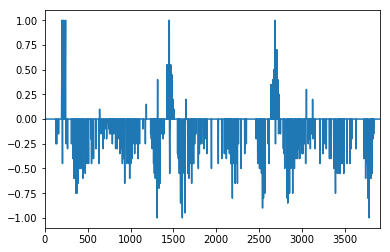

In [11]:
df['steering_angle'].plot()

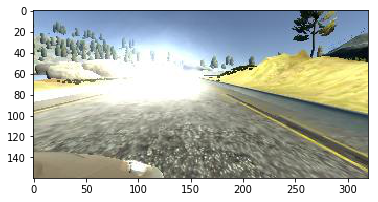

In [12]:
img = Image.open(df['right'][0])
plt.imshow(img)

In [13]:
img = np.asarray(img)

In [14]:
def loadImage(fname):
    return np.asarray(Image.open(fname))
def process_image(img):
    return img[10:130:2, ::4, :]

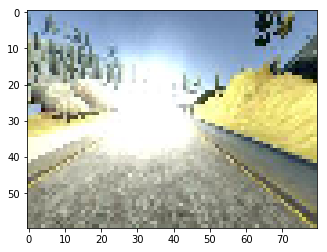

In [15]:
img = process_image(loadImage(df['center'][0]))
plt.imshow(img)

In [19]:
X = [process_image(loadImage(fname)) for fname in df['center'] ]
X += [process_image(loadImage(fname)) for fname in df['right'] ]
X += [process_image(loadImage(fname)) for fname in df['left'] ]
y = np.asarray(df['steering_angle'])
y = np.concatenate([y, y+0.4, y-0.4])

In [20]:
X = np.array(X)
print(X.shape)
print(y.shape)

(11721, 60, 80, 3)
(11721,)


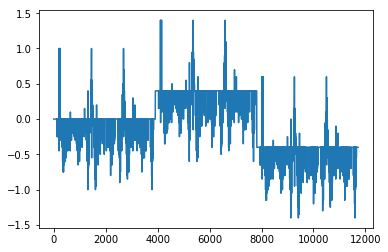

In [21]:
plt.plot(y)
plt.show();

In [22]:
np.save('X.npy', X)
np.save('y.npy', y)